# Data Visualization - Cumulative Lab

## Introduction
You've completed the data visualization section — excellent work. Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives

You will be able to:

* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary
* Use data visualizations to present your findings

## Your Task: Analyze the Text of Shakespeare's Macbeth

![cover page of macbeth](images/macbeth.jpg)

<span>Photo by <a href="https://unsplash.com/@voodoojava?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Matt Riches</a> on <a href="https://unsplash.com/s/photos/shakespeare?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Business Understanding

**Natural language processing** (also known as **NLP**) is a major subfield within data science. At its most advanced, NLP has helped us build interactive AI assistants like Siri and Alexa.

Even in a simpler business context where you just need to summarize the contents of a dataset, text data often requires much more substantial preprocessing work compared to data that is already in a numeric format.

One typical technique for understanding a text dataset is to find the **most common** or **least common** words. To do this, we need to build a ***Frequency Distribution*** table, just like when we were finding the mode of a dataset. We'll display the thousands of word frequencies as a **histogram**.

Then we can find the mode (the word that appears most often), as well as the "runner-up" words, in order to describe a large text dataset with a minimal set of words and numbers. We'll display this information as a **bar graph** with the words as labels on the x-axis and the counts as the y-axis.

### Data Understanding

For this lab we'll be using the **full text of Shakespeare's Macbeth**. We will retrieve it for you from the [Project Gutenberg](https://www.gutenberg.org/) website in the format of a single (giant) string, containing over one hundred thousand characters. We'll refer to this string variously as the "document", "corpus", or "text dataset", all terms used frequently within NLP.

We don't recommend that you try to print the entire string due to its length, but if you're curious about any particular segment, you can use string slicing just like any other string. E.g. `macbeth[1000:2000]` will select just the slice from the 1000th to the 2000th character.

When counting the words, make sure you remove any punctuation and convert all words to lowercase. We want all of the following strings to be counted as instances of `"is"`:

 - `"is"`
 - `"Is"`
 - `"is,"`
 - `"is!"`
 - etc.

### Requirements

#### 1. Word Count Summary

Extract each word from the document and print a count of all words.

#### 2. Unique Word Count

First, clean up the collection of words so all punctuation is removed and every word is lowercase. Then print a count of the unique words in that collection.

#### 3. Frequency Table

Using the cleaned collection of words, build a frequency table that has the words as keys and the counts of those words as values. From that frequency table, print the modal (most common) word as well as the least common word, along with their frequencies.

#### 4. Visualizations

**Histogram:** Using Matplotlib or Seaborn, create a histogram of all of the word frequencies in Macbeth.

**Bar graph:** Using Matplotlib or Seaborn, create a bar graph of the 25 most common words in Macbeth, from the 1st to 25th most common.


## Getting the Data
Here we start by importing a Python package called `requests`. You'll see this package described in more detail in future lessons, but for now all you need to know is that it allows us to fetch data over the internet!

We'll use it to pull the transcript of Macbeth from the Project Gutenberg website, specifically [this page](https://www.gutenberg.org/cache/epub/2264/pg2264.txt). We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 103,605 characters - the first 500 of which are printed below. 

In [1]:
# Run this cell without changes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set_context("talk")
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Run this cell without changes
response = requests.get('https://www.gutenberg.org/cache/epub/2264/pg2264.txt')
full_text = response.text

# The beginning describes the source/copyright, it isn't the actual text
# of the play until the 16648th character
macbeth = full_text[16648:]

# Print string summary
print("Data type:", type(macbeth))
print()
print("Number of characters:", len(macbeth))
print()
print("First 500 characters:")
print(macbeth[:500])

Data type: <class 'str'>

Number of characters: 103605

First 500 characters:
The Tragedie of Macbeth

Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge 


## Word Count Summary

Create a variable `word_count` that is an integer representing the total count of words in `macbeth`. In order to do this, first create a variable `words_raw` that is a list containing all words in the string.

Hint: look at the `.split()` string method ([documentation here](https://docs.python.org/3/library/stdtypes.html#str.split))

In [3]:
# Replace None with appropriate code
words_raw = macbeth.split()
word_count = len(words_raw)

print("Macbeth contains {} words".format(word_count))
print("Here are some examples:", words_raw[11:21])

Macbeth contains 17737 words
Here are some examples: ['Enter', 'three', 'Witches.', '1.', 'When', 'shall', 'we', 'three', 'meet', 'againe?']


## Unique Word Count

Create a variable `unique_word_count` that is an integer representing the count of unique words in Macbeth.

In order to create an accurate count, first create a variable `words_cleaned` that contains each word stripped of punctuation and made lowercase. Then assign `unique_word_count` to the count of words in `words_cleaned`.

Hint: look at the `.strip()` string method ([documentation here](https://docs.python.org/3/library/stdtypes.html#str.strip)). Note that you need to strip each individual word, not just the whole `macbeth` string.

**Reminder:** strings are an *immutable* data type. That means that in order to modify their values, you have to reassign them with `=`. So, for example, if you wanted to make the variable `name` be title case, you need to do `name = name.title()`, not just `name.title()`.

In [7]:
# Replace None with appropriate code

# You can use this punctuation string for defining what characters to remove
import string
punctuation = string.punctuation

words_cleaned = []

for word in words_raw:
    # Remove punctuation
    translating = str.maketrans('', '', punctuation)
    word = word.translate(translating)
    # Make lowercase
    word=word.lower()
    # Append to words_cleaned
    words_cleaned.append(word)

# Use this print statement to double-check that everything
# is lowercase and has punctuation removed
print("Cleaned word examples:", words_cleaned[11:21])

Cleaned word examples: ['enter', 'three', 'witches', '1', 'when', 'shall', 'we', 'three', 'meet', 'againe']


In [8]:
# Replace None with appropriate code
unique_word_count = None

print("Macbeth contains {} unique words".format(unique_word_count))

Macbeth contains None unique words


## Frequency Table

Now that we have a general sense of how *many* words there are, let's investigate how *frequently* each of those words appears in the dataset. Build a frequency table called `word_counts` where the keys are the words (strings) and the values are the number of times that string appears. Then set `most_frequent_word` to the word that occurs most frequently and `least_frequent_word` to the word that occurs least frequently.

To accomplish this, use the same algorithm used in the **Implementing Statistics with Functions** lab earlier, specifically the function to find the mode. This time we will provide you with some clues, but fewer than before. Remember that you can look at that lab (and its solution) or the solution to this lab if you are getting really stuck.

The general algorithm for building a frequency table is:

1. Initialize an empty dictionary (`word_counts`)
2. Loop over every element in the collection (`words_cleaned`) and add to the dictionary
    - If the element is not already in the dictionary keys, add a new key-value pair with the value 1
    - If the element is already in the dictionary keys, add 1 to the associated value


In [9]:
# Your code here
# Your code here
word_counts = {}
    
for word in words_cleaned:
    if (word in word_counts):
        word_counts[word] += 1
    else:
        word_counts[word] = 1

print(type(word_counts)) # <class 'dict'>
print(len(word_counts))  # 3577

print(type(word_counts)) # <class 'dict'>
print(len(word_counts))  # 3577

<class 'dict'>
3558
<class 'dict'>
3558


Now it's time to find `most_frequent_word` and `least_frequent_word`. Again, this follows the logic of the mode function from the previous lab.

The general algorithm for finding the most frequent word is:

1. Find the *maximum* value in the dictionary (`word_counts`)
2. Loop over all items in the dictionary until you find the key associated with that *maximum* value

Then the algorithm for finding the least frequent is just the inverse:

1. Find the *minimum* value in the dictionary
2. Loop over all items in the dictionary until you find the key associated with that *minimum* value

Think about how you might accomplish this with a single loop, but don't worry if it takes you two loops (just look at the solution when you are done and compare).

In [10]:
# Your code here
for key, value in word_counts.items():
    if value == max(word_counts.values()):
        most_frequent_word = key
    if value == min(word_counts.values()):
        least_frequent_word = key

print("The most frequent word in Macbeth is '{}', which appears {} times".format(
    most_frequent_word, word_counts[most_frequent_word]
))
print("The least frequent word in Macbeth is '{}', which appears {} times".format(
    least_frequent_word, word_counts[least_frequent_word]
))

The most frequent word in Macbeth is 'the', which appears 647 times
The least frequent word in Macbeth is 'finis', which appears 1 times


## Visualizations

### Histogram

At last, it's time for some visualizations! First, let's make a **histogram** to visualize the frequency distribution of all 3,577 words (i.e. the distribution of `word_counts.values()`). 

Details:

 - We recommend using Matplotlib for this, since it allows you to customize the figure size. A `figsize` of (15,5) will work well for this, since it has a "long tail". 100 bins is also a good number.
 - Make sure you include appropriate labels on the axes and the title
 - You can use any colors or styles that look good to you

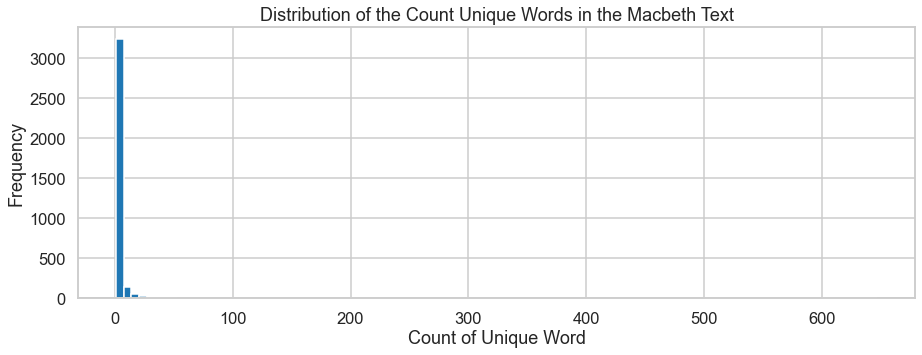

In [11]:
# Your code here
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(word_counts.values(), bins=100)

# Add labels for x and y axes
ax.set_xlabel('Count of Unique Word')
ax.set_ylabel('Frequency')

# Add a title for the plot
ax.set_title('Distribution of the Count Unique Words in the Macbeth Text');

Wow, that is a very skewed dataset! It looks like the overwhelming majority of words appear about 20 times or fewer, but we also have words (like 'the', the most common word discovered above) that appear hundreds of times. Those very frequent words are so rare that we can't even see their associated counts, the bars are so small.

### Bar Graph

Let's move on to making a bar graph of the most frequent words, to gain more insight into that end of the distribution's "tail". To do this, we need to sort the contents of `word_counts` by value, and then select only the top 25 key-value pairs.

For this task we are giving you even fewer hints than before. Check out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation, especially the `student_tuples` example. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

Now that we have our data, let's make a bar graph. Just to keep it interesting, let's make this a ***horizontal*** **bar graph**. Horizontal bar graphs are useful when you have a lot of text labels — it avoids having to turn the labels diagonally or even sideways in order for them to fit next to each other.

**Matplotlib:** In a horizontal bar graph with Matplotlib, `y` is where you pass in the dummy tick values, and `width` is where you pass in the frequencies (vs. `x` and `height` in a standard bar chart). Full documentation for `.barh()`, the horizontal bar chart method, [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.barh.html#matplotlib.axes.Axes.barh).

**Seaborn:** With Seaborn, you still use the `.barplot()` function, just with the `orient` argument set to `"h"`. You'll want to pass in the dummy tick values as `y` and frequencies as `x`. Full documentation [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).

Details:

 - You can use either Matplotlib or Seaborn
 - Make sure you include appropriate labels on the axes and the title
 - You can use any colors or styles that look good to you

In [ ]:
# Your code here

## Level Up (Optional)
This cumulative lab should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time (creating a relevant visualization for each):

* **When counting words, skip** ***stopwords***
  * Stopwords are commonly-occurring words that NLP analysts often disregard. Most of the top 25 words in our current version are stopwords ("the", "and", etc.). Try redoing both the histogram and the horizontal bar chart with stopwords removed
  * Mechanically, that means skipping adding a word to `word_counts` if it is a stop word. Try using this list of stopwords:
```
["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
```
* **Create a list of top characters by mentions of their names**
  * Mechanically, that means only adding a word to `word_counts` if it is the name of a character. Try using this list of single-word characters (leaving out characters like "Young Seyward", and "Lady Macduff" is referred to as "wife" in this version):
```
["duncan", "malcolm", "donalbaine", "macbeth", "banquo", "macduff", "lenox", "rosse", "menteth", "angus", "cathnes", "fleance", "seyward", "seyton", "boy", "lady", "messenger", "wife"]
```
* **Split the text by which character is talking**
  * A character speaking is indicated by an (often-abbreviated) version of their name followed by a `.` as the first thing on a line. So for example, when Macbeth speaks it starts with `"Macb."` (notice how `"macb"` appears in the top 25 words — that is Macbeth speaking). You'll need to revise how you handle punctuation, since you can't just strip all punctuation
* **Create subgraphs of the most common words by character**
* **Come up with some other fun analyses of the text!**

There is no solution version of these level-up options. If you're having too much trouble, it's fine to move on without completing any of them!

In [ ]:
# Your code here

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!